<a href="https://colab.research.google.com/github/nitinmukesh681/GoogleColabFiles/blob/master/final_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib import dates
sns.set_style("whitegrid")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
dataset = pd.read_csv('https://covid.ourworldindata.org/data/ecdc/full_data.csv',parse_dates=True)

In [0]:
dataset['date'] = pd.to_datetime(dataset['date'])

In [0]:
dataset.dtypes

date            datetime64[ns]
location                object
new_cases                int64
new_deaths               int64
total_cases              int64
total_deaths             int64
dtype: object

In [0]:
dataset = dataset.set_index('date')

In [0]:
india_dataset = dataset[dataset['location']=='India']['2020-02-15':]

In [0]:
india_dataset.describe()

,new_cases,new_deaths,total_cases,total_deaths
count,65.000000,65.000000,65.000000,65.000000
mean,265.569231,8.353846,2562.246154,78.892308
std,410.066266,13.626067,4470.514302,145.716133
min,0.000000,0.000000,3.000000,0.000000
25%,0.000000,0.000000,3.000000,0.000000
50%,28.000000,0.000000,165.000000,3.000000
75%,472.000000,9.000000,2902.000000,68.000000
max,1553.000000,43.000000,17265.000000,543.000000


Text(0.5, 1.0, 'cumulative number of cases in India')

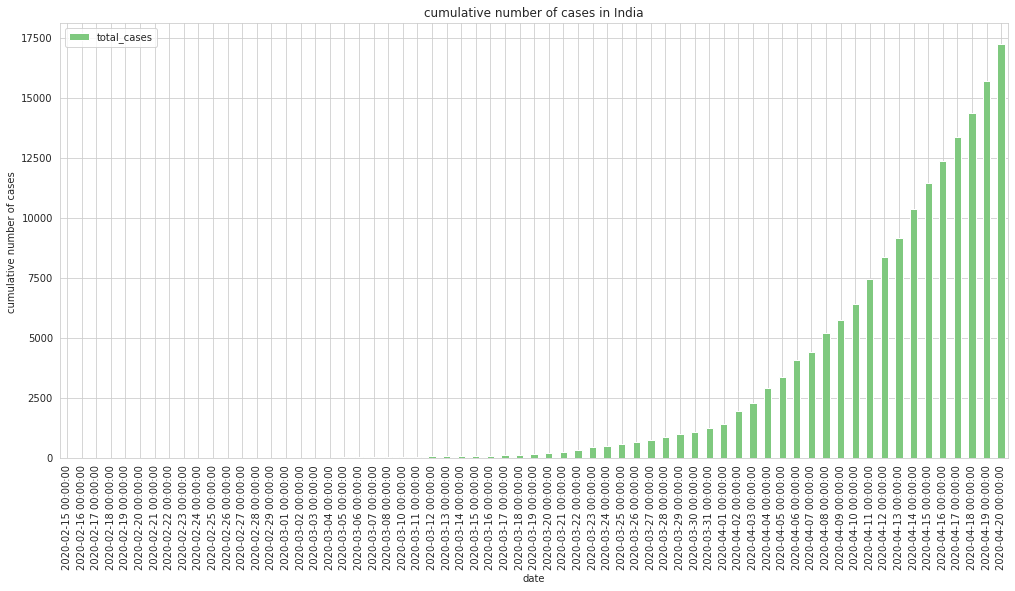

In [0]:
ax = india_dataset[['total_cases']].plot.bar(figsize=(17,8),colormap='Accent')
ax.set_ylabel('cumulative number of cases ')
ax.set_title('cumulative number of cases in India')

Text(0.5, 1.0, 'cumulative number of deaths in India')

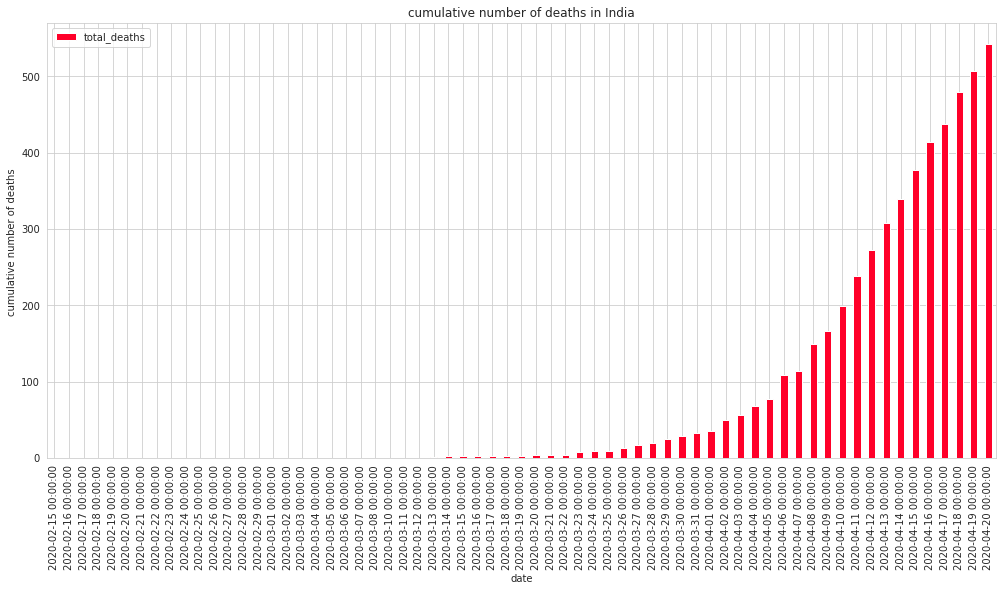

In [0]:
ax1 = india_dataset[['total_deaths']].plot.bar(figsize=(17,8),colormap='gist_rainbow')
ax1.set_ylabel('cumulative number of deaths ')
ax1.set_title('cumulative number of deaths in India')

Text(0.5, 1.0, 'New number of cases in India (daily)')

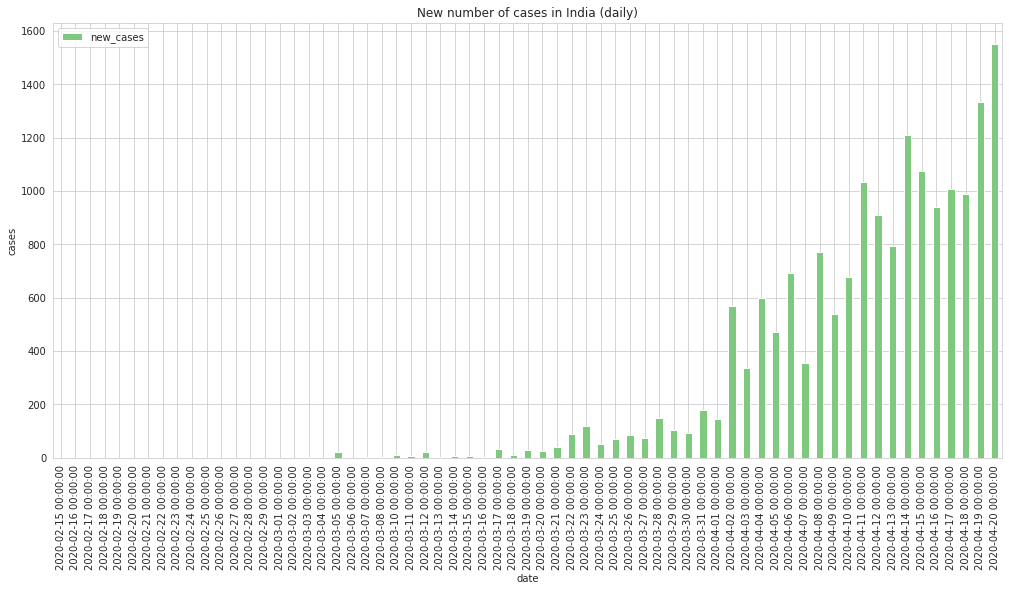

In [0]:
ax2 = india_dataset[['new_cases']].plot.bar(figsize=(17,8),colormap='Accent')
ax2.set_ylabel('cases')
ax2.set_title('New number of cases in India (daily)')

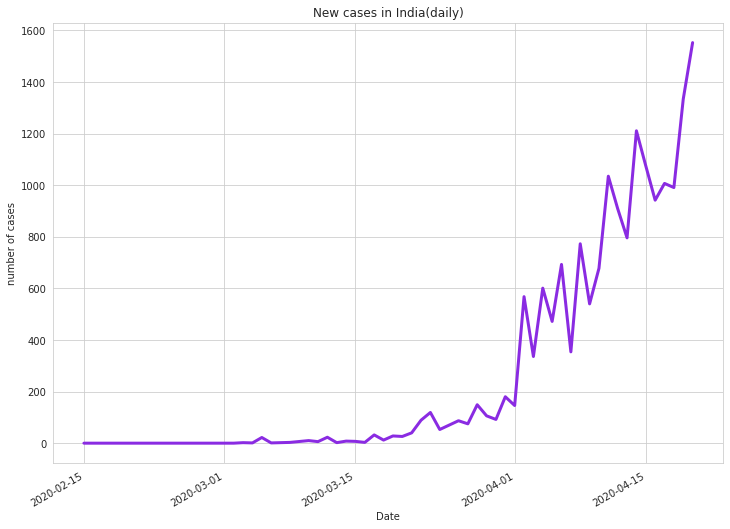

In [0]:
#plot of new Cases in India
plt.figure(figsize=(12,9))
ax3 = india_dataset['new_cases'].plot(color='blueviolet',lw=3)
ax3.set_xlabel('Date')
ax3.set_ylabel('number of cases')
ax3.set_title('New cases in India(daily)')

plt.show()

Text(0.5, 1.0, 'New number of deaths in India (daily)')

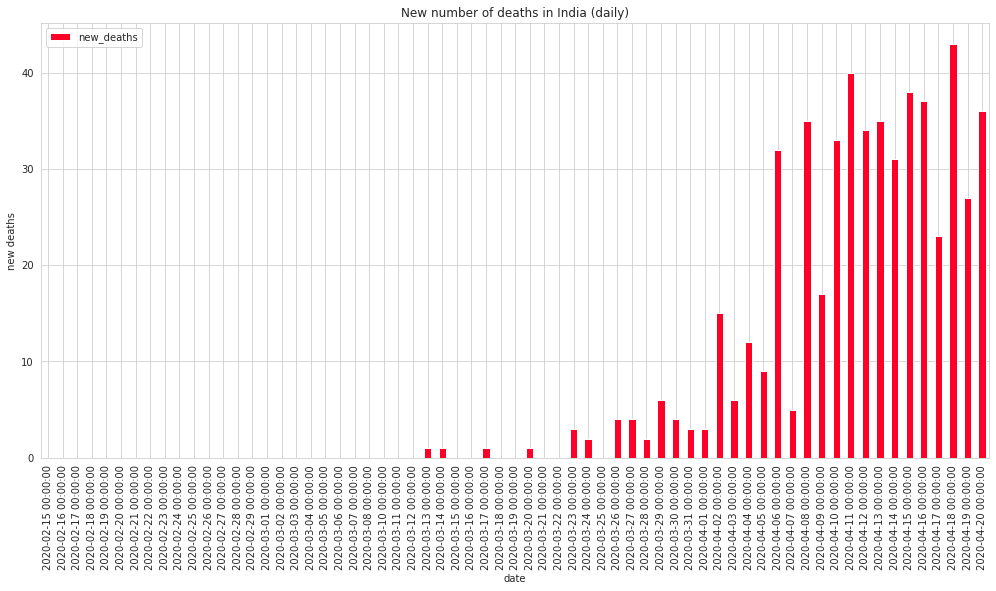

In [0]:
ax4 = india_dataset[['new_deaths']].plot.bar(figsize=(17,8),colormap='gist_rainbow')
ax4.set_ylabel('new deaths')
ax4.set_title('New number of deaths in India (daily)')

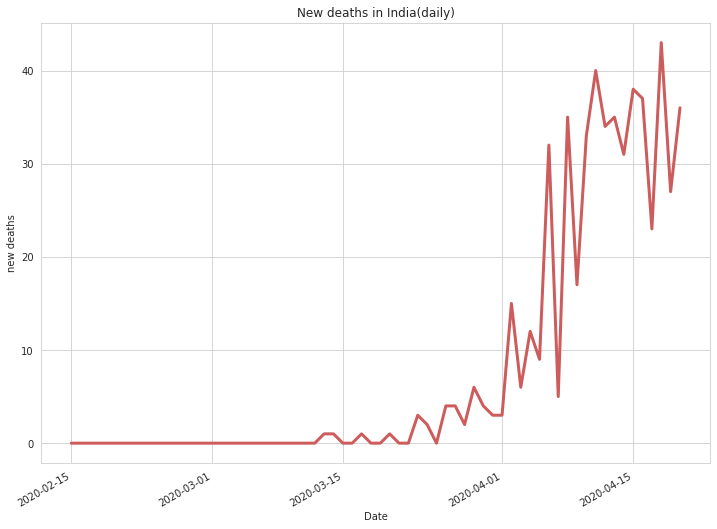

In [0]:
#plot of new Cases in India
plt.figure(figsize=(12,9))
ax3 = india_dataset['new_deaths'].plot(color='indianred',lw=3)
ax3.set_xlabel('Date')
ax3.set_ylabel('new deaths')
ax3.set_title('New deaths in India(daily)')

plt.show()

## Moving Avaerage Model (based on last 7 observation)

###Basic Setup
1. We will choose window size = 3 for now

2. We will select the dataset of last 10 days as our test data and calculate mean squared error and mean percentage error

In [0]:
train_india_total_cases = india_dataset[['total_cases']][:'2020-04-10']



test data


In [0]:
test_india_total_cases = india_dataset[['total_cases']]['2020-04-10':]

In [0]:
train_india_total_cases['MA_3'] = train_india_total_cases['total_cases'].rolling(window=3).mean()

In [0]:
train_india_total_cases.tail()

,total_cases,MA_3
date,,
2020-04-06,4067,3447.666667
2020-04-07,4421,3954.000000
2020-04-08,5194,4560.666667
2020-04-09,5734,5116.333333
2020-04-10,6412,5780.000000


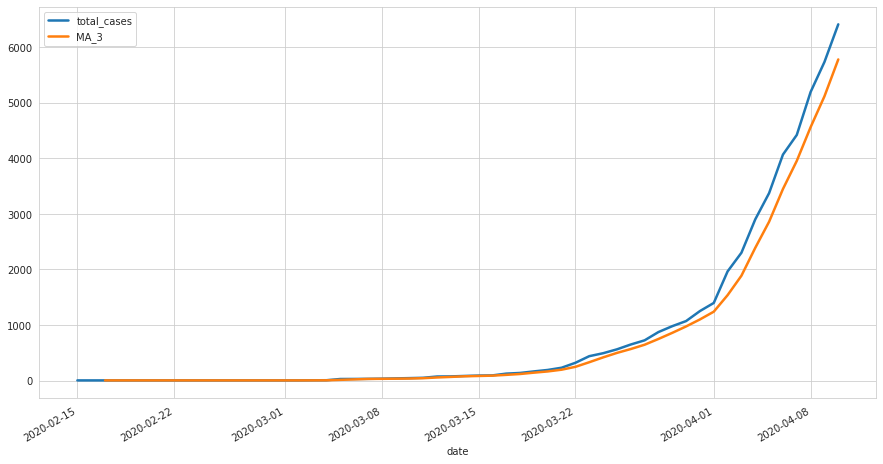

In [0]:
train_india_total_cases[['total_cases','MA_3']].plot(legend=True,figsize=(15,8),lw=2.5)

### now predict for the last ten days  and find and mean squared error

In [0]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
import numpy as np

In [0]:
y_hat = list(train_india_total_cases[-3:]['total_cases'])
k=3
for _ in range(0,11):
  y_hat.append(np.mean(y_hat[-3:]))

In [0]:
y_hat = y_hat[3:]

In [0]:
print(len(y_hat))
print(len(test_india_total_cases))

11
11


In [0]:
test_india_total_cases['predictedMA_3'] = y_hat

In [0]:
test_india_total_cases

,total_cases,predictedMA_3
date,,
2020-04-10,6412,5780.000000
2020-04-11,7447,5975.333333
2020-04-12,8356,6055.777778
2020-04-13,9152,5937.037037
2020-04-14,10363,5989.382716
2020-04-15,11438,5994.065844
2020-04-16,12380,5973.495199
2020-04-17,13387,5985.647920
2020-04-18,14378,5984.402987


In [0]:
mse_MA = mean_squared_error(test_india_total_cases['total_cases'],test_india_total_cases['predictedMA_3'])

In [0]:
rmse = np.sqrt(mse_MA)

### Moving average Mean squared error

In [0]:
rmse

6432.789006752262

##Weighted Moving Average

Basic workflow:
1. we will start with same predicting for last ten days for calculating rmse.
2. Here, we will use weighted Moving Average Model with previous 3 time data.

so, weight will be 
```
--> for x_t -> 1/2
--> for x_t-1 -> 1/3
--> for x_t-2 -> 1/6
```

In [0]:
#function to find the weighted Moving Average Model

def findWMA(n,arr):
  fact = n*(n+1)/2
  weight = np.array([i/fact for i in range(1,n+1)])

  return np.sum(weight*np.array(arr))

In [0]:
WMA_pred = [np.nan,np.nan]
k=3 #number of previous time stamp

In [0]:
for i in range(0,len(train_india_total_cases['total_cases'])-2):
  WMA_pred.append(findWMA(k,list(train_india_total_cases['total_cases'].iloc[i:i+k])))

In [0]:
train_india_total_cases['WMA_pred'] = WMA_pred

In [0]:
train_india_total_cases.tail()

,total_cases,MA_3,WMA_pred
date,,,
2020-04-06,4067,3447.666667,3641.833333
2020-04-07,4421,3954.000000,4128.500000
2020-04-08,5194,4560.666667,4748.500000
2020-04-09,5734,5116.333333,5335.166667
2020-04-10,6412,5780.000000,5983.000000


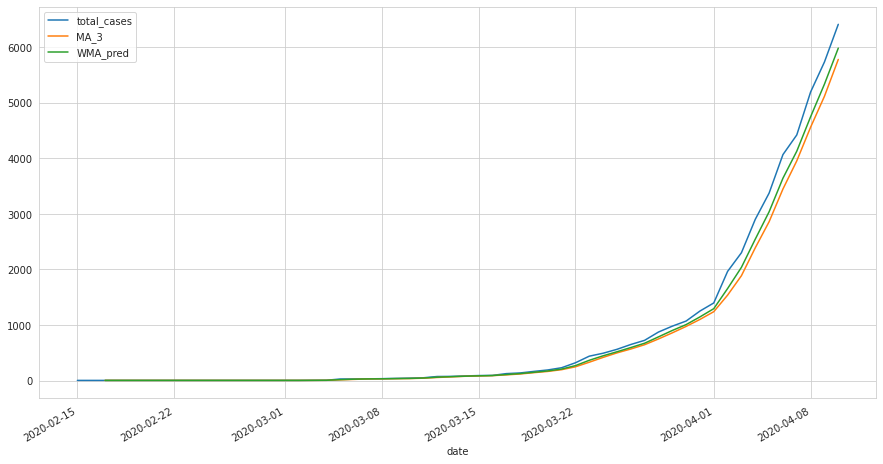

In [0]:
train_india_total_cases[['total_cases','MA_3','WMA_pred']].plot(legend = True,figsize=(15,8))

find it for test set to find rmse


In [0]:
y_hat = list(train_india_total_cases['total_cases'].iloc[-k:])
print(y_hat)
for i in range(0,11):
  y_hat.append(findWMA(k,np.array(y_hat[i:i+k])))
  

[5194, 5734, 6412]


In [0]:
y_hat

[5194,
 5734,
 6412,
 5983.0,
 6084.5,
 6105.25,
 6077.958333333333,
 6088.145833333333,
 6087.600694444443,
 6086.175347222222,
 6086.978877314814,
 6086.814670138888,
 6086.762852044752,
 6086.816128954474]

In [0]:
len(y_hat)

14

In [0]:
test_india_total_cases['WMA_3'] = y_hat[3:]

In [0]:
wma_mse = mean_squared_error(test_india_total_cases['total_cases'],test_india_total_cases['WMA_3'])

In [0]:
wma_rmse = np.sqrt(wma_mse)

###Weighted Moving Average RMSE

In [0]:
wma_rmse

6343.933981593662

## Exponential Weighted Moving Average

###Simple Exponential Smoothing

In [0]:
train_india_total_cases['EWMA_3'] = train_india_total_cases['total_cases'].ewm(span=2,adjust=False).mean()

In [0]:
train_india_total_cases.tail()

,total_cases,MA_3,WMA_pred,EWMA_3
date,,,,
2020-04-06,4067,3447.666667,3641.833333,3754.505537
2020-04-07,4421,3954.000000,4128.500000,4198.835179
2020-04-08,5194,4560.666667,4748.500000,4862.278393
2020-04-09,5734,5116.333333,5335.166667,5443.426131
2020-04-10,6412,5780.000000,5983.000000,6089.142044


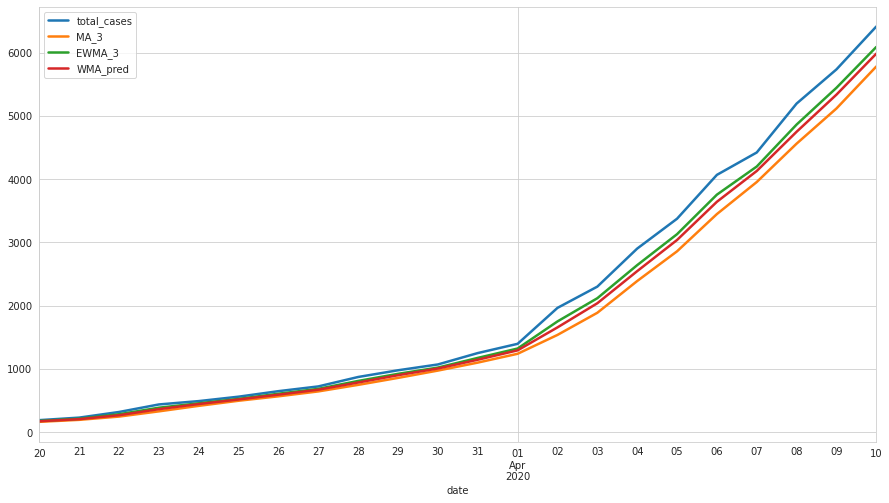

In [0]:
train_india_total_cases[['total_cases','MA_3','EWMA_3','WMA_pred']]['2020-03-20':].plot(legend=True,figsize=(15,8),lw=2.5)

In [0]:
def find_wma_ahead(alpha,yt_1,xt):
  return (1-alpha)*yt_1+alpha*xt

In [0]:
y_hat = [train_india_total_cases['EWMA_3'].iloc[-1]]

for i in range(0,11):
  y_hat.append(find_wma_ahead(2/3,y_hat[-1],test_india_total_cases['total_cases'].iloc[i]))

In [0]:
print(len(y_hat[1:]))
print(len(test_india_total_cases['total_cases']))

11
11


In [0]:
test_india_total_cases['EWMA_3'] = y_hat[1:]

In [0]:
test_india_total_cases

,total_cases,predictedMA_3,WMA_3,EWMA_3
date,,,,
2020-04-10,6412,5780.000000,5983.000000,6304.380681
2020-04-11,7447,5975.333333,6084.500000,7066.126894
2020-04-12,8356,6055.777778,6105.250000,7926.042298
2020-04-13,9152,5937.037037,6077.958333,8743.347433
2020-04-14,10363,5989.382716,6088.145833,9823.115811
2020-04-15,11438,5994.065844,6087.600694,10899.705270
2020-04-16,12380,5973.495199,6086.175347,11886.568423
2020-04-17,13387,5985.647920,6086.978877,12886.856141
2020-04-18,14378,5984.402987,6086.814670,13880.952047


In [0]:
ewma_mse = mean_squared_error(test_india_total_cases['total_cases'],test_india_total_cases['EWMA_3'])

In [0]:
ewma_mse

247541.21974911343

### Simple exponential Smoothing(with alpha 2/3) RMSE

In [0]:
np.sqrt(ewma_mse)

497.535144235172

## Double Exponential Smoothing
Where Simple Exponential Smoothing employs just one smoothing factor  α  (alpha), Double Exponential Smoothing adds a second smoothing factor  β (beta) that addresses trends in the data. Like the alpha factor, values for the beta factor fall between zero and one ( 0<β≤1 ). The benefit here is that the model can anticipate future increases or decreases where the level model would only work from recent calculations.

We can also address different types of change (growth/decay) in the trend. If a time series displays a straight-line sloped trend, you would use an additive adjustment. If the time series displays an exponential (curved) trend, you would use a multiplicative adjustment.

### Additive adjustment

In [0]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

train_india_total_cases['DESadd2'] = ExponentialSmoothing(train_india_total_cases['total_cases'], trend='add').fit().fittedvalues
train_india_total_cases.head()

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


,total_cases,MA_3,WMA_pred,EWMA_3,DESadd2
date,,,,,
2020-02-15,3,NaN,NaN,3.0,3.0
2020-02-16,3,NaN,NaN,3.0,3.0
2020-02-17,3,3.0,3.0,3.0,3.0
2020-02-18,3,3.0,3.0,3.0,3.0
2020-02-19,3,3.0,3.0,3.0,3.0


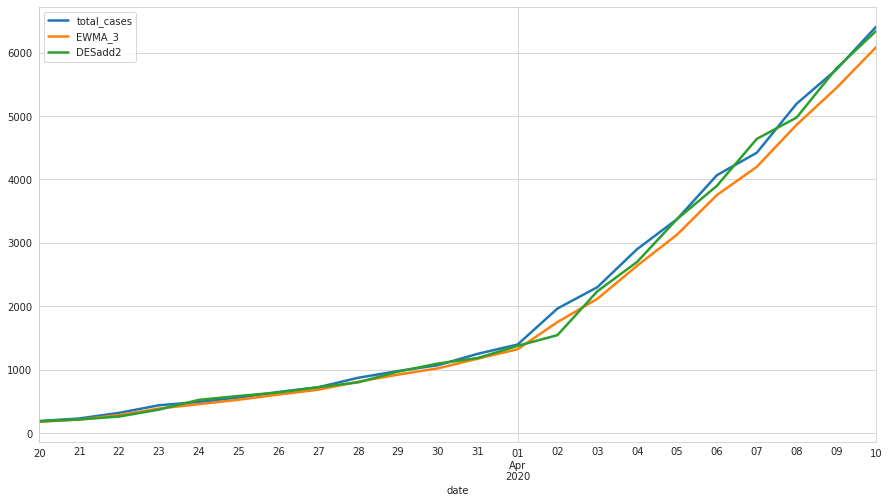

In [0]:
train_india_total_cases[['total_cases','EWMA_3','DESadd2']]['2020-03-20':].plot(legend=True,figsize=(15,8),lw=2.5)

In [0]:
#forcasting for test data
anc = ExponentialSmoothing(train_india_total_cases['total_cases'], trend='add').fit().forecast(11)

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


In [0]:
anc_list = [i for i in anc]
print(anc_list)

[7036.668994457818, 7679.026121832236, 8321.383249206652, 8963.74037658107, 9606.097503955487, 10248.454631329903, 10890.81175870432, 11533.168886078738, 12175.526013453156, 12817.883140827573, 13460.24026820199]


In [0]:
test_india_total_cases['DESadd2'] = anc_list

In [0]:
test_india_total_cases

,total_cases,predictedMA_3,WMA_3,EWMA_3,DESadd2
date,,,,,
2020-04-10,6412,5780.000000,5983.000000,6304.380681,7036.668994
2020-04-11,7447,5975.333333,6084.500000,7066.126894,7679.026122
2020-04-12,8356,6055.777778,6105.250000,7926.042298,8321.383249
2020-04-13,9152,5937.037037,6077.958333,8743.347433,8963.740377
2020-04-14,10363,5989.382716,6088.145833,9823.115811,9606.097504
2020-04-15,11438,5994.065844,6087.600694,10899.705270,10248.454631
2020-04-16,12380,5973.495199,6086.175347,11886.568423,10890.811759
2020-04-17,13387,5985.647920,6086.978877,12886.856141,11533.168886
2020-04-18,14378,5984.402987,6086.814670,13880.952047,12175.526013


In [0]:
DESadd_mse = mean_squared_error(test_india_total_cases['total_cases'],test_india_total_cases['DESadd2'])

In [0]:
DESadd_rmse = np.sqrt(DESadd_mse)

### Double Exponential Smoothing(Additive smoothing) RMSE

In [0]:
DESadd_rmse

1804.6903320707715

### multiplicative smoothing

In [0]:
train_india_total_cases['DESmult2'] = ExponentialSmoothing(train_india_total_cases['total_cases'], trend='mul',damped=False).fit().fittedvalues
train_india_total_cases.head()

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


,total_cases,MA_3,WMA_pred,EWMA_3,DESadd2,DESmult2
date,,,,,,
2020-02-15,3,NaN,NaN,3.0,3.0,3.0
2020-02-16,3,NaN,NaN,3.0,3.0,3.0
2020-02-17,3,3.0,3.0,3.0,3.0,3.0
2020-02-18,3,3.0,3.0,3.0,3.0,3.0
2020-02-19,3,3.0,3.0,3.0,3.0,3.0


In [0]:
train_india_total_cases.tail()

,total_cases,MA_3,WMA_pred,EWMA_3,DESadd2,DESmult2
date,,,,,,
2020-04-06,4067,3447.666667,3641.833333,3754.505537,3899.754976,4089.163752
2020-04-07,4421,3954.000000,4128.500000,4198.835179,4639.248282,4843.057666
2020-04-08,5194,4560.666667,4748.500000,4862.278393,4976.198977,5072.897114
2020-04-09,5734,5116.333333,5335.166667,5443.426131,5752.701239,5900.281420
2020-04-10,6412,5780.000000,5983.000000,6089.142044,6344.785095,6470.125585


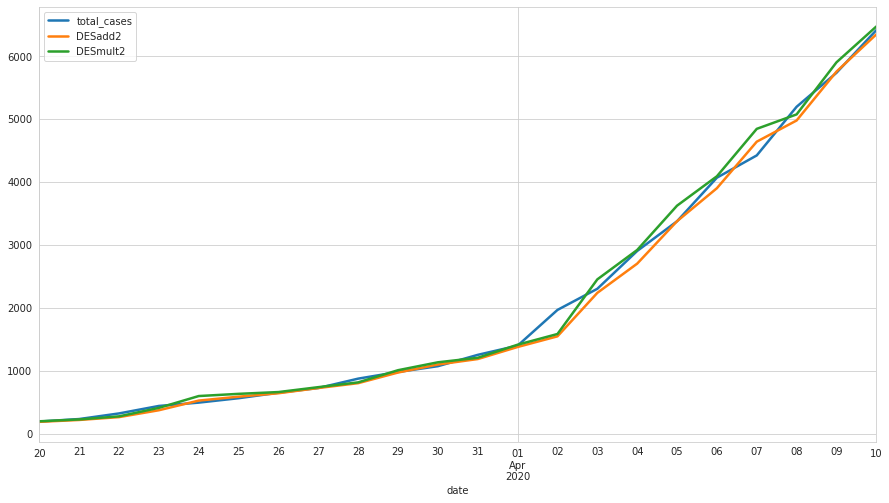

In [0]:
train_india_total_cases[['total_cases','DESadd2','DESmult2']]['2020-03-20':].plot(legend=True,figsize=(15,8),lw=2.5)

In [0]:
#forcast for test data
anc = ExponentialSmoothing(train_india_total_cases['total_cases'], trend='mul',damped=False).fit(optimized=True).forecast(11)

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


In [0]:
anc_list = [i for i in anc]
print(anc_list)

[7164.644863752723, 7990.3864538059415, 8911.296637210273, 9938.343810458673, 11083.760502646997, 12361.189069627071, 13785.844179741767, 15374.694026410001, 17146.66242587367, 19122.854207168828, 21326.806578802873]


In [0]:
test_india_total_cases['DESmult2'] = anc_list

In [0]:
des_mult_rmse = np.sqrt(mean_squared_error(test_india_total_cases['total_cases'],test_india_total_cases['DESmult2']))

### Double Exponential Smoothing (Multiplication Smoothing)

In [0]:
des_mult_rmse

2020.0185410504569

In [0]:
test_india_total_cases

,total_cases,predictedMA_3,WMA_3,EWMA_3,DESadd2,DESmult,DESmult2
date,,,,,,,
2020-04-10,6412,5780.000000,5983.000000,6304.380681,7036.668994,7164.644864,7164.644864
2020-04-11,7447,5975.333333,6084.500000,7066.126894,7679.026122,7990.386454,7990.386454
2020-04-12,8356,6055.777778,6105.250000,7926.042298,8321.383249,8911.296637,8911.296637
2020-04-13,9152,5937.037037,6077.958333,8743.347433,8963.740377,9938.343810,9938.343810
2020-04-14,10363,5989.382716,6088.145833,9823.115811,9606.097504,11083.760503,11083.760503
2020-04-15,11438,5994.065844,6087.600694,10899.705270,10248.454631,12361.189070,12361.189070
2020-04-16,12380,5973.495199,6086.175347,11886.568423,10890.811759,13785.844180,13785.844180
2020-04-17,13387,5985.647920,6086.978877,12886.856141,11533.168886,15374.694026,15374.694026
2020-04-18,14378,5984.402987,6086.814670,13880.952047,12175.526013,17146.662426,17146.662426


## Triple exponential Smoothing (Holt-Winters-Methods)





In [0]:
train_india_total_cases['TES_add7'] = ExponentialSmoothing(train_india_total_cases['total_cases'],trend='add',seasonal='add',seasonal_periods=7).fit(optimized=True).fittedvalues

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


In [0]:
train_india_total_cases.tail(10)

,total_cases,MA_3,WMA_pred,EWMA_3,DESadd2,DESmult2,TES_add7
date,,,,,,,
2020-04-01,1397,1239.666667,1294.000000,1322.845476,1376.089032,1412.246825,1376.089032
2020-04-02,1965,1537.666667,1656.666667,1750.948492,1545.445245,1582.497657,1545.445245
2020-04-03,2301,1887.666667,2038.333333,2117.649497,2236.330487,2450.658430,2236.330487
2020-04-04,2902,2389.333333,2545.500000,2640.549832,2700.832765,2917.848784,2700.832765
2020-04-05,3374,2859.000000,3037.833333,3129.516611,3375.133304,3622.125732,3375.133304
2020-04-06,4067,3447.666667,3641.833333,3754.505537,3899.754976,4089.163752,3899.754976
2020-04-07,4421,3954.000000,4128.500000,4198.835179,4639.248282,4843.057666,4639.248282
2020-04-08,5194,4560.666667,4748.500000,4862.278393,4976.198977,5072.897114,4976.198977
2020-04-09,5734,5116.333333,5335.166667,5443.426131,5752.701239,5900.281420,5752.701239


Here I observed that Triple exponential Smoothing with additive smoothing gives same results as double exponential smoothing with additive smoothing. So, I will not take it forward for further analysis.

Not let us see the Multiplicative smoothing

### Multiplicative Smoothing

In [0]:
train_india_total_cases['TES_mul7'] = ExponentialSmoothing(train_india_total_cases['total_cases'],trend='mul',seasonal='mul',seasonal_periods=7).fit(optimized=True).fittedvalues

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [0]:
train_india_total_cases.tail(10)

,total_cases,MA_3,WMA_pred,EWMA_3,DESadd2,DESmult2,TES_add7,TES_mul7
date,,,,,,,,
2020-04-01,1397,1239.666667,1294.000000,1322.845476,1376.089032,1412.246825,1376.089032,1467.333438
2020-04-02,1965,1537.666667,1656.666667,1750.948492,1545.445245,1582.497657,1545.445245,1588.434830
2020-04-03,2301,1887.666667,2038.333333,2117.649497,2236.330487,2450.658430,2236.330487,2434.311075
2020-04-04,2902,2389.333333,2545.500000,2640.549832,2700.832765,2917.848784,2700.832765,3052.982601
2020-04-05,3374,2859.000000,3037.833333,3129.516611,3375.133304,3622.125732,3375.133304,3508.453513
2020-04-06,4067,3447.666667,3641.833333,3754.505537,3899.754976,4089.163752,3899.754976,4158.158044
2020-04-07,4421,3954.000000,4128.500000,4198.835179,4639.248282,4843.057666,4639.248282,4543.312574
2020-04-08,5194,4560.666667,4748.500000,4862.278393,4976.198977,5072.897114,4976.198977,5252.904217
2020-04-09,5734,5116.333333,5335.166667,5443.426131,5752.701239,5900.281420,5752.701239,5916.063942


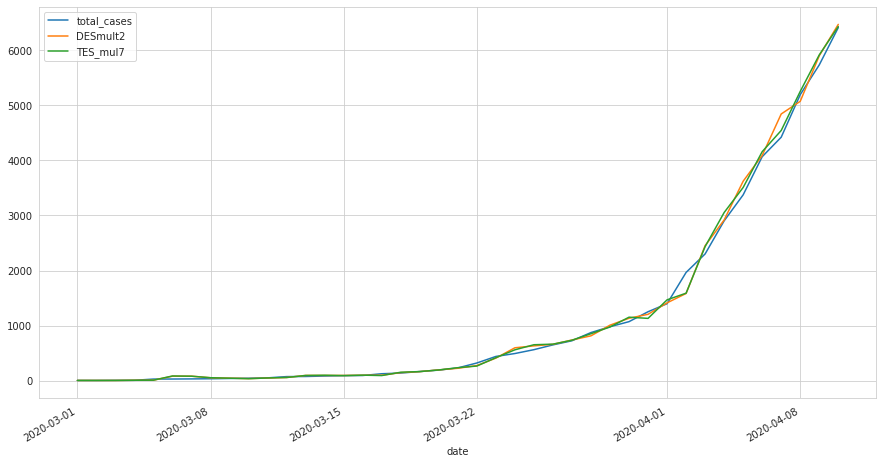

In [0]:
train_india_total_cases[['total_cases','DESmult2','TES_mul7']]['2020-03-01':].plot(legend=True,figsize=(15,8))

In [0]:
anc = ExponentialSmoothing(train_india_total_cases['total_cases'],trend='mul',seasonal='mul',seasonal_periods=7).fit(optimized=True).forecast(11)

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


In [0]:
anc_list = [i for i in anc]
print(anc_list)

[7501.096372219227, 8255.140336263907, 9511.820503010305, 10108.905677616422, 11609.044049132537, 12914.370816664603, 14361.653482779802, 16790.455180558198, 18478.307296330564, 21291.260359325173, 22627.775898617427]


In [0]:
test_india_total_cases['TES_mul7'] = anc_list

In [0]:
tes_mult_rmse = np.sqrt(mean_squared_error(test_india_total_cases['total_cases'],test_india_total_cases['TES_mul7']))

### Triple exponential Smoothing (mulitiplicative sommothing RMSE)

In [0]:
tes_mult_rmse

3015.6198954917368

## Model Summaries